# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов!

Данные мы будем использовать из Kaggle соревнования: https://www.kaggle.com/competitions/nlp-getting-started/data 


Оттуда надо скачать файл train.csv. На обучающую и тестовую выборки его поделим кодом ниже, менять его не надо!

Мы будем работать с датасетом постов из твиттера. Нам предстоит решать задачу бинарной классификации - определять содержатся ли в твитте информация о настоящей катастрофе/инциденте или нет.

In [594]:
import numpy as np
import pandas as pd
from typing import  List
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation

In [595]:
data = pd.read_csv('train.csv')

In [596]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [597]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42)

## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [598]:
data.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [599]:
test.fillna(' ', inplace= True)
train.fillna(' ', inplace= True)

## Задание 2 (1 балл)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Какое распределение классов в обучающей выборке?


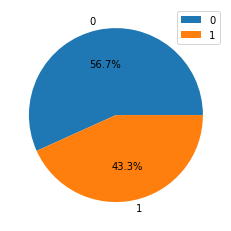

In [600]:
plt.pie(train['target'].value_counts(), labels=['0', '1'], autopct='%1.1f%%')
plt.legend()
plt.show()

2. Посмотрите на колонку "keyword" - возьмите 10 наиболее встречающихся значений, постройте ступенчатую диаграмму распределения классов в зависимости от значения keyword, сделайте выводы.

In [601]:
popular_keywords = train['keyword'].value_counts().nlargest(10).index
popular_keywords_test = test['keyword'].value_counts().nlargest(10).index

In [602]:
a = popular_keywords.tolist()
b = popular_keywords_test.tolist()

In [603]:
data_top = train[train['keyword'].isin(a)]
data_top_test = test[test['keyword'].isin(b)]

In [604]:
class_distribution = data_top.groupby(['keyword', 'target']).size().unstack()
class_distribution_test = data_top_test.groupby(['keyword', 'target']).size().unstack()


<AxesSubplot:title={'center':'Test'}, xlabel='keyword'>

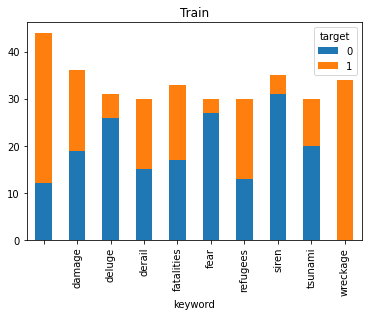

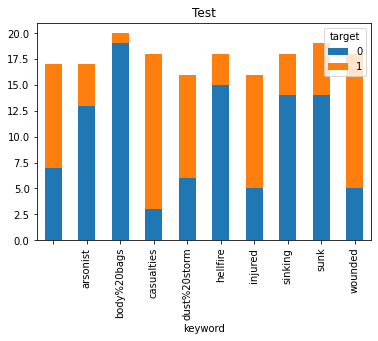

In [605]:
class_distribution.plot(kind='bar', stacked=True, title = 'Train' )
class_distribution_test.plot(kind='bar', stacked=True, title = 'Test' )

In [606]:
class_distribution = class_distribution.reset_index().melt(id_vars='keyword')
class_distribution_test = class_distribution_test.reset_index().melt(id_vars='keyword')

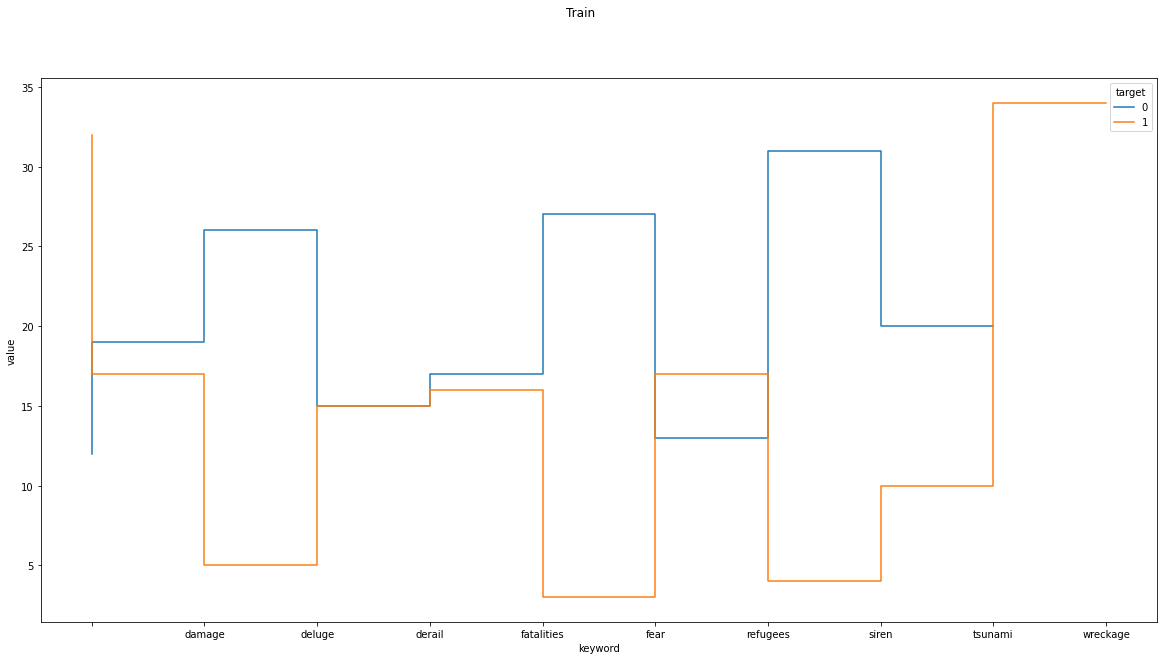

In [607]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=class_distribution, x='keyword', y='value', hue='target', drawstyle='steps', sort=True)
plt.suptitle('Train')
plt.show()

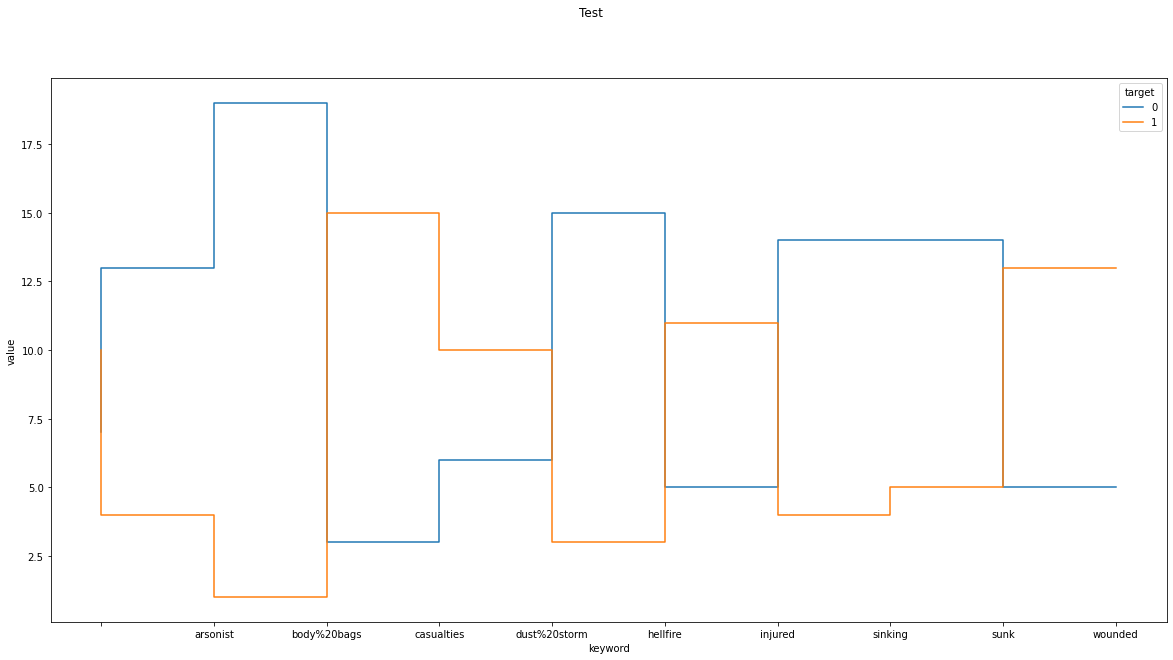

In [608]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=class_distribution_test, x='keyword', y='value', hue='target', drawstyle='steps', sort=True)
plt.suptitle('Test')
plt.show()

**Выводы**: Как мы видим, несмотря на небольшой дисбаланс классов в общей train выборке, отдельно у популярных ключевых словах дисбаланс может быть достаточно сильный (в основном в пользу 0)
У теста мы также видим достаточно сильный дисбаланс, как в одну, так и в другую сторону 

## Задание 3 (0.5 балла) 

В этом задании предлагается объединить все три текстовых столбца в один (просто сконкатенировать cтроки) и убрать столбец с индексом.

In [609]:
train.loc[[6590, 7122, 2769]]

,id,keyword,location,text,target
6590,9436,survivors,"Marietta, GA",Stemming from my #Cubs talk- the team rosters ...,1
7122,10203,violent%20storm,,If you were the NWS wth a rotating storm w/ a ...,1
2769,3980,devastation,Atlanta g.a.,http://t.co/Gxgm1T3W0J From Devastation to Ela...,0


In [610]:
# -- YOUR CODE HERE --
train_new = train.copy()
train_new['text_all'] = train_new[['keyword', 'location', 'text']].apply(lambda x: ' '.join(x), axis=1)
train_new.drop(['id','keyword', 'location', 'text'], axis=1, inplace=True)

In [611]:
test_new = test.copy()
test_new['text_all'] = test_new[['keyword', 'location', 'text']].apply(lambda x: ' '.join(x), axis=1)
test_new.drop(['id','keyword', 'location', 'text'], axis=1, inplace=True)

In [612]:
train_new.loc[[6590, 7122, 2769]]

,target,text_all
6590,1,"survivors Marietta, GA Stemming from my #Cubs ..."
7122,1,violent%20storm If you were the NWS wth a ro...
2769,0,devastation Atlanta g.a. http://t.co/Gxgm1T3W0...


## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [613]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

# -- YOUR CODE HERE --

In [614]:
X_train = vectorizer.fit_transform(train_new['text_all'])

In [615]:
vectorizer.vocabulary_

{'bridge': 2948,
 '20collapse': 320,
 'ashes': 1928,
 '2015': 295,
 'australia': 2059,
 'ûªs': 18425,
 'collapse': 3914,
 'at': 1977,
 'trent': 16483,
 'among': 1628,
 'worst': 17813,
 'in': 8314,
 'history': 7773,
 'england': 5722,
 'bundled': 3085,
 'out': 11995,
 'for': 6503,
 '60': 755,
 'http': 7970,
 'co': 3861,
 't5trhjuau0': 15733,
 'hail': 7420,
 'carol': 3363,
 'stream': 15419,
 'illinois': 8249,
 'great': 7206,
 'michigan': 10594,
 'technique': 15888,
 'camp': 3261,
 'b1g': 2147,
 'thanks': 16013,
 'to': 16272,
 'bmurph1019': 2753,
 'hail_youtsey': 7421,
 'termn8r13': 15949,
 'goblue': 7088,
 'wrestleon': 17848,
 'oaskgki6qj': 11648,
 'police': 12634,
 'houston': 7933,
 'cnn': 3854,
 'tennessee': 15932,
 'movie': 10940,
 'theater': 16025,
 'shooting': 14647,
 'suspect': 15632,
 'killed': 9246,
 'by': 3150,
 'di8elzswnr': 4890,
 'rioting': 13800,
 'still': 15357,
 'couple': 4204,
 'of': 11708,
 'hours': 7925,
 'left': 9644,
 'until': 16884,
 'have': 7546,
 'be': 2383,
 'up': 

In [616]:
X_train.shape

(5329, 18455)

### Размер матрицы 5329 на 18455 (всего 5329 строк в нашем первоначальном датасете и 18455 токенов всего в нашем первоначальном датасете)

## Задание 5 (1 балл)

В предыдущем пункте у вас должна была получиться достаточно большая матрица.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов, ссылок и прочего мусора.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле vocabulary_ инстанса этого класса. Давайте напишем функцию, которая печает ответы на следующие вопросы:

1. Найдите в этом словаре все слова, которые содержат цифры. Сколько таких слов нашлось?

2. Найдите все слова, которые содержат символы пунктуации. Сколько таких слов нашлось? 

3. Сколько хэштегов (токен начинается на #) и упоминаний (токен начинается на @) осталось в словаре?

In [617]:
def contains_digit(s: str) -> bool:
    # Проверка, содержит ли слово цифры
    # -- YOUR CODE HERE --
    return any([i.isdigit() for i in s])

def contains_punctuation(s: str) -> bool:
    # Проверка, содержит ли слово пунктуацию
    # -- YOUR CODE HERE --
    return any([i in punctuation for i in s])

def is_hashtag(s: str) -> bool:
    # Проверка, является ли слово хэштегом
    # -- YOUR CODE HERE --
    return s.startswith('#')

def is_mention(s: str) -> bool:
    # Проверка, является ли слово упоминанием
    # -- YOUR CODE HERE --
    return s.startswith('@')

def investigate_vocabulary(vocabulary):
    # -- YOUR CODE HERE --
    digits = []
    puncts = [] 
    hashtags = []
    mentions = []
    for i in vocabulary.keys():
        if contains_digit(i):
            digits.append(i)
        if contains_punctuation(i):
            puncts.append(i)
        if is_hashtag(i):
            hashtags.append(i)
        if is_mention(i):
            mentions.append(i)
        
      
    print('With digit:  ', digits)  
    print('With punctuation:', puncts)
    print('Hashtags:        ', hashtags)
    print('Mentions:        ', mentions)   




In [618]:
dummy_vocab = {'th1nk' : 0,
               'think333' : 1,
               'think.' : 2,
               'th!nk' : 3,
               'th...nk' : 4,
               '#think' : 5,
               '@think' : 6,
               '@thinking':7,
               '@nothink' : 8,
               'think' : 9}
investigate_vocabulary(dummy_vocab)

With digit:   ['th1nk', 'think333']
With punctuation: ['think.', 'th!nk', 'th...nk', '#think', '@think', '@thinking', '@nothink']
Hashtags:         ['#think']
Mentions:         ['@think', '@thinking', '@nothink']


In [619]:
investigate_vocabulary(vectorizer.vocabulary_)

With digit:   ['20collapse', '2015', '60', 't5trhjuau0', 'b1g', 'bmurph1019', 'termn8r13', 'oaskgki6qj', 'di8elzswnr', '20accident', 'tagzbcxfj0', 'xxfk4khbiw', 'mkx6ux4ozt', 'ma4ra7atql', 'cg579wldne', '7xglah10zl', 'musbik7ejf', '20bag', '35', '23', '419', 'hcdiwe5flc', 'roughdeal1', '65', '11', '20bombing', 'jackmulholland1', 'czdw8oowa2', 'zl7ojdaj3u', 'lkjfabqzb3', '20burning', '1acd4900c1424d1', '20fires', 'ns1aggfnxz', '3m', 'od250zshfy', 'wd9odwjj9l', '20on', '20fire', 'tweetlikeitsseptember11th2001', '20spill', 'ks100', '7o4lnfbe7k', '20responders', 'tl93aod3er', '20', 'obix79ncxn', 'z8r6r3nbtb', 'namffldh5h', '53inch', '300w', '4x4', 'o097vsotxk', 'i23xy7iejj', '00', '06', 'thhjjw51pe', '01', '325ci', '5l', 'l6', 'c211hise0r', '10', 'xbznu0qkvs', 'jlczidz7vu', 'mylittlepwnies3', '80s', 'lhw4vtbhzg', 'yh5vetm0yz', '17wgug8z0m', '073izwx0lb', '18', 'e7fn5g5ruu', '75k', '52k', 'shhlv4dplz', '20storm', 'sf5jdnvdw9', '20wave', 'k9airfq3ql', '20reactor', 'ys3nmwwyvc', 'alpotnb7q3',

## Задание 6 (0.5 балла)

Вспомним, что на семинаре по текстам мы узнали, что в nltk есть специальный токенизатор для текстов - TweetTokenizer. Попробуем применить CountVectorizer с этим токенизатором. Ответьте на все вопросы из предыдущего пункта для TweetTokenizer и сравните результаты.

In [620]:
from nltk.tokenize import TweetTokenizer
# Чтобы узнать, какие параметры есть у этого токенайзера - используйте help(TweetTokenizer)
# Для того, чтобы передать токенайзер в CountVectorizer используйте параметр tokenizer

In [621]:
tweet_tokenizer = TweetTokenizer()

In [622]:
vectorizer1 = CountVectorizer(tokenizer=tweet_tokenizer.tokenize)

# обучите векторизатор на текстовых данных
X_train = vectorizer1.fit_transform(train_new['text_all'])


In [623]:
investigate_vocabulary(vectorizer1.vocabulary_)

With digit:   ['20collapse', '2015', '60', 'http://t.co/t5trhjuau0', 'b1g', '@bmurph1019', '@termn8r13', 'http://t.co/oaskgki6qj', 'http://t.co/di8elzswnr', '20accident', 'http://t.co/tagzbcxfj0', 'http://t.co/xxfk4khbiw', 'https://t.co/mkx6ux4ozt', 'https://t.co/ma4ra7atql', 'http://t.co/cg579wldne', 'http://t.co/7xglah10zl', 'https://t.co/musbik7ejf', '2', '20bag', '35', '7.23', '419-3', 'http://t.co/hcdiwe5flc', '@roughdeal1', '65', '11', '20bombing', '@jackmulholland1', 'https://t.co/czdw8oowa2', 'http://t.co/zl7ojdaj3u', '6', 'http://t.co/lkjfabqzb3', '20burning', '@1acd4900c1424d1', '20fires', 'http://t.co/ns1aggfnxz', '2.0', '3m', 'http://t.co/od250zshfy', 'http://t.co/wd9odwjj9l', '20on', '20fire', '#tweetlikeitsseptember11th2001', '20spill', 'ks100', 'http://t.co/7o4lnfbe7k', '20responders', 'http://t.co/tl93aod3er', '20', 'http://t.co/obix79ncxn', 'http://t.co/z8r6r3nbtb', 'http://t.co/namffldh5h', '53inch', '300w', '4x4', 'http://t.co/o097vsotxk', 'http://t.co/i23xy7iejj', '

**Сравнение:** Можно заметить, что с помощью твит токенайзера мы нормально отделили хэштэги и упоминания 

## Задание 7 (2 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью TweetTokenizer из пакета nltk
2. Удалит все токены содержащие не латинские буквы, кроме смайликов (будем считать ими токены содержащие только пунктуацию и, как минимум, одну скобочку) и хэштегов, которые после начальной # содержат только латинские буквы.
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords.words('english')
4. Проведет стемминг с помощью SnowballStemmer



In [624]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import nltk
nltk.download('stopwords')
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dmitrysakharov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [625]:
tweet_tokenizer = TweetTokenizer()
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')

In [626]:
def contains_only_latin_letters(s: str) -> bool:
    # Проверка, содержит ли слово только латинские буквы
    # -- YOUR CODE HERE --
    return all(ord(c) < 128 for c in s) and s.isalpha()

def is_emoji(s: str) -> bool:
    # Проверка, является ли слово смайликом
    # -- YOUR CODE HERE --
    if '(' not in s and ')' not in s:
        return False
    return all([i in punctuation for i in s])


def is_hashtag(s: str) -> bool:
    # Проверка, является ли слово хэштегом
    # -- YOUR CODE HERE --
    if s.startswith('#')==False:
        return False
    return s[1:].isalpha()

def custom_preprocessor(s: str) -> str:
    return s.lower()

def custom_tokenizer(s: str) -> List[str]:    
    # Кастомный токенайзер
    # -- YOUR CODE HERE --
    tokens = tweet_tokenizer.tokenize(s)
    f_tokens = []
    for token in tokens:
        if (contains_only_latin_letters(token) or is_emoji(token) or is_hashtag(token)) and token not in stop_words:
            stemmed_token = stemmer.stem(token)
            f_tokens.append(stemmed_token)
    return f_tokens
  

In [627]:
custom_tokenizer('She LOVES painting :-) #art')

['she', 'love', 'paint', ':-)', '#art']

Продемонстрируйте работу вашей функции на первых десяти текстах в обучающей выборке.

In [628]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer2 = CountVectorizer(preprocessor = custom_preprocessor, tokenizer=custom_tokenizer)


In [629]:
train_new1 = train_new[0:10]['text_all']

In [630]:
train_new1

1186    bridge%20collapse   Ashes 2015: AustraliaÛªs ...
4071    hail Carol Stream, Illinois GREAT MICHIGAN TEC...
5461    police Houston  CNN: Tennessee movie theater s...
5787    rioting   Still rioting in a couple of hours l...
7445    wounds Lake Highlands Crack in the path where ...
151     airplane%20accident Somewhere Out There Expert...
915     bloody Isolated City In World Perth 'I came to...
1305    burning   @JohnsonTionne except idk them?? it'...
2570    destroy he/him or she/her (ask) destroy the house
7399    wounded Maracay y Nirgua, Venezuela Police Off...
Name: text_all, dtype: object

In [631]:
X = vectorizer2.fit_transform(train_new1)

In [632]:
X.shape

(10, 94)

In [633]:
X.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 1, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0,

## Задание 8 (1 балл)

1. Примените CountVectorizer с реализованным выше токенизатором к обучающим и тестовым выборкам.


In [634]:
vectorizer = CountVectorizer(preprocessor = custom_preprocessor, tokenizer=custom_tokenizer)
# -- YOUR CODE HERE --
X_train = vectorizer.fit_transform(train_new['text_all'])
X_test = vectorizer.transform(test_new['text_all'])


In [635]:
y_train = train_new['target']
y_test = test_new['target']

In [636]:
from sklearn.linear_model import LogisticRegression
# -- YOUR CODE HERE --
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


3. Посчитайте метрику f1-score на тестовых данных.

In [637]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)

print('F1-score: ', f1)

F1-score:  0.7533584094572812


## Задание 9 (1 балл)

1. Повторите 8 задание, но с tf-idf векторизатором. Как изменилось качество?


In [638]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(preprocessor = custom_preprocessor, tokenizer=custom_tokenizer)
# -- YOUR CODE HERE --
X_train = vectorizer.fit_transform(train_new['text_all'])
X_test = vectorizer.transform(test_new['text_all'])

In [639]:
X_train.shape

(5329, 10485)

In [640]:
X_test.shape

(2284, 10485)

In [641]:
y_train = train_new['target']
y_test = test_new['target']

In [642]:
from sklearn.linear_model import LogisticRegression
# -- YOUR CODE HERE --
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [643]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)

print('F1-score: ', f1)

F1-score:  0.7429205996668518


1. **Ответ:** Чуть-чуть ухудшилось

2. Мы можем еще сильнее уменьшить размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?


In [644]:
# 2
# -- YOUR CODE HERE --
vectorizer = TfidfVectorizer(preprocessor = custom_preprocessor, tokenizer=custom_tokenizer,max_df=0.9)
# -- YOUR CODE HERE --
X_train1 = vectorizer.fit_transform(train_new['text_all'])
X_test1 = vectorizer.transform(test_new['text_all'])
y_train = train_new['target']
y_test = test_new['target']
# -- YOUR CODE HERE --
model = LogisticRegression()
model.fit(X_train1, y_train)
y_pred = model.predict(X_test1)
f1 = f1_score(y_test, y_pred)

print('F1-score: ', f1)


F1-score:  0.7429205996668518


In [645]:
print(X_train1.shape)
print(X_test1.shape)

(5329, 10485)
(2284, 10485)


2. **Ответ:** Улучшения качества нет, размер матрицы также не изменился

3. Также мы можем уменьшить размер матрицы, удаляя слова со слишком маленьким df. Удалось ли добиться улучшения качества? 

In [646]:
# 3
# -- YOUR CODE HERE --
# 2
# -- YOUR CODE HERE --
for minn in [0.00015, 0.0002, 0.00025, 0.0003, 0.00035, 0.0005, 0.001, 0.005, 0.01, 0.02]:
    vectorizer = TfidfVectorizer(preprocessor = custom_preprocessor, tokenizer=custom_tokenizer, min_df=minn)
    # -- YOUR CODE HERE --
    X_train1 = vectorizer.fit_transform(train_new['text_all'])
    X_test1 = vectorizer.transform(test_new['text_all'])
    y_train = train_new['target']
    y_test = test_new['target']
    # -- YOUR CODE HERE --
    model = LogisticRegression()
    model.fit(X_train1, y_train)
    y_pred = model.predict(X_test1)
    f1 = f1_score(y_test, y_pred)

    print('min_df', minn, 'F1-score: ', f1, 'X_train shape', X_train1.shape)



min_df 0.00015 F1-score:  0.7429205996668518 X_train shape (5329, 10485)
min_df 0.0002 F1-score:  0.7462520821765685 X_train shape (5329, 4522)
min_df 0.00025 F1-score:  0.7462520821765685 X_train shape (5329, 4522)
min_df 0.0003 F1-score:  0.7462520821765685 X_train shape (5329, 4522)
min_df 0.00035 F1-score:  0.7462520821765685 X_train shape (5329, 4522)
min_df 0.0005 F1-score:  0.7444690265486725 X_train shape (5329, 3135)
min_df 0.001 F1-score:  0.7445175438596492 X_train shape (5329, 1740)
min_df 0.005 F1-score:  0.7201735357917571 X_train shape (5329, 393)
min_df 0.01 F1-score:  0.6288361320208454 X_train shape (5329, 127)
min_df 0.02 F1-score:  0.4056463595839524 X_train shape (5329, 24)


3. **Ответ:** Да, получилось добиться небольшого улучшения (максимальное улучшение от минимума 0.0002 до 0.00035)

## Задание 10 (1 балл)

Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 8 с HashingVectorizer, укажите количество фичей равное 5000.


In [647]:
from sklearn.feature_extraction.text import HashingVectorizer

# -- YOUR CODE HERE --
vectorizer = HashingVectorizer(n_features=5000, preprocessor=custom_preprocessor, tokenizer=custom_tokenizer)
X_train1 = vectorizer.fit_transform(train_new['text_all'])
X_test1 = vectorizer.transform(test_new['text_all'])
y_train = train_new['target']
y_test = test_new['target']
# -- YOUR CODE HERE --
model = LogisticRegression()
model.fit(X_train1, y_train)
y_pred = model.predict(X_test1)
f1 = f1_score(y_test, y_pred)

print('F1 score: *YOUR SCORE*', f1)

/Users/dmitrysakharov/opt/anaconda3/envs/cat/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


F1 score: *YOUR SCORE* 0.7194645844952593


2. Какой из подходов показал самый высокий результат?


2. **Ответ:** 
Обычный count vectorizer 

## Задание 11 (1 балл)

В этом задании нужно добиться f1 меры хотя в 0.75 на тестовых данных.

Вообще я добился 0.75 с обычным каунт вектонайзером, однако попробую побить этот рекорд

In [649]:

for maxx  in [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]:
    vectorizer = TfidfVectorizer(min_df=0.0003, max_df = maxx)
    # -- YOUR CODE HERE --
    X_train1 = vectorizer.fit_transform(train_new['text_all'])
    X_test1 = vectorizer.transform(test_new['text_all'])
    y_train = train_new['target']
    y_test = test_new['target']
    # -- YOUR CODE HERE --
    model = LogisticRegression()
    model.fit(X_train1, y_train)
    y_pred = model.predict(X_test1)
    f1 = f1_score(y_test, y_pred)
    print('max_df', maxx, 'F1-score: ', f1, 'X_train shape', X_train1.shape)



max_df 0.1 F1-score:  0.7486157253599114 X_train shape (5329, 5733)
max_df 0.2 F1-score:  0.7486218302094818 X_train shape (5329, 5737)
max_df 0.3 F1-score:  0.749448123620309 X_train shape (5329, 5740)
max_df 0.4 F1-score:  0.7506909894969596 X_train shape (5329, 5741)
max_df 0.5 F1-score:  0.7502774694783574 X_train shape (5329, 5742)
max_df 0.6 F1-score:  0.7497219132369298 X_train shape (5329, 5743)


Также результата >0.75 я добился с TfidfVectorizer c дефолтным токенизатором, mindf=0.0003 и maxdf = 0.4.